### Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score




###  Read the data from csv file

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### checking for the null values

In [8]:
df.isnull().sum()  #Column Wise

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
df.isnull().sum(axis=1) #Row wise

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

### Removing unwanted columns

In [10]:
df_new=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]


In [11]:
# Convert to 'category' data type

df_new['season']=df_new['season'].astype('category')
df_new['weathersit']=df_new['weathersit'].astype('category')
df_new['mnth']=df_new['mnth'].astype('category')
df_new['weekday']=df_new['weekday'].astype('category')

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [13]:
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

### Visualising data 

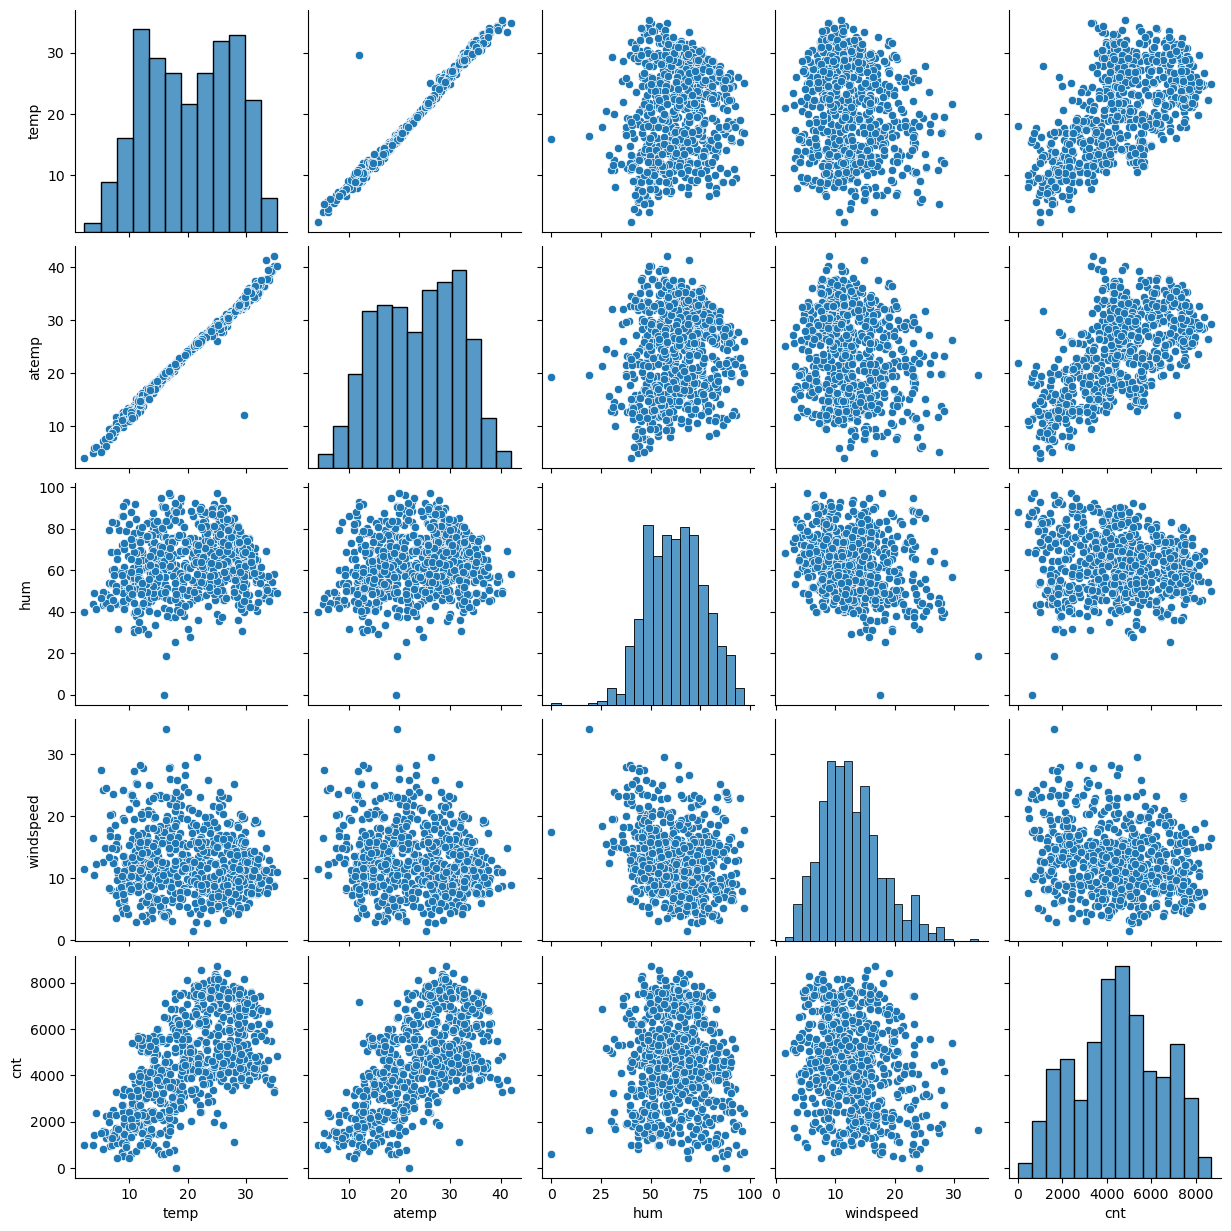

In [14]:
sns.pairplot(data=df_new,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

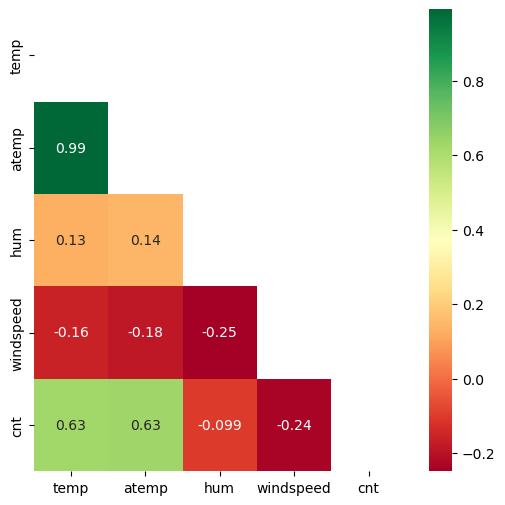

In [15]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df_new[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### We get a linear relationship between temp and atemp

In [16]:

df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


### Splitting the Data into Training and Testing

In [18]:
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [19]:
df_train.shape

(510, 30)

In [20]:
df_test.shape

(220, 30)

In [21]:
scaler = MinMaxScaler()

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [22]:
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


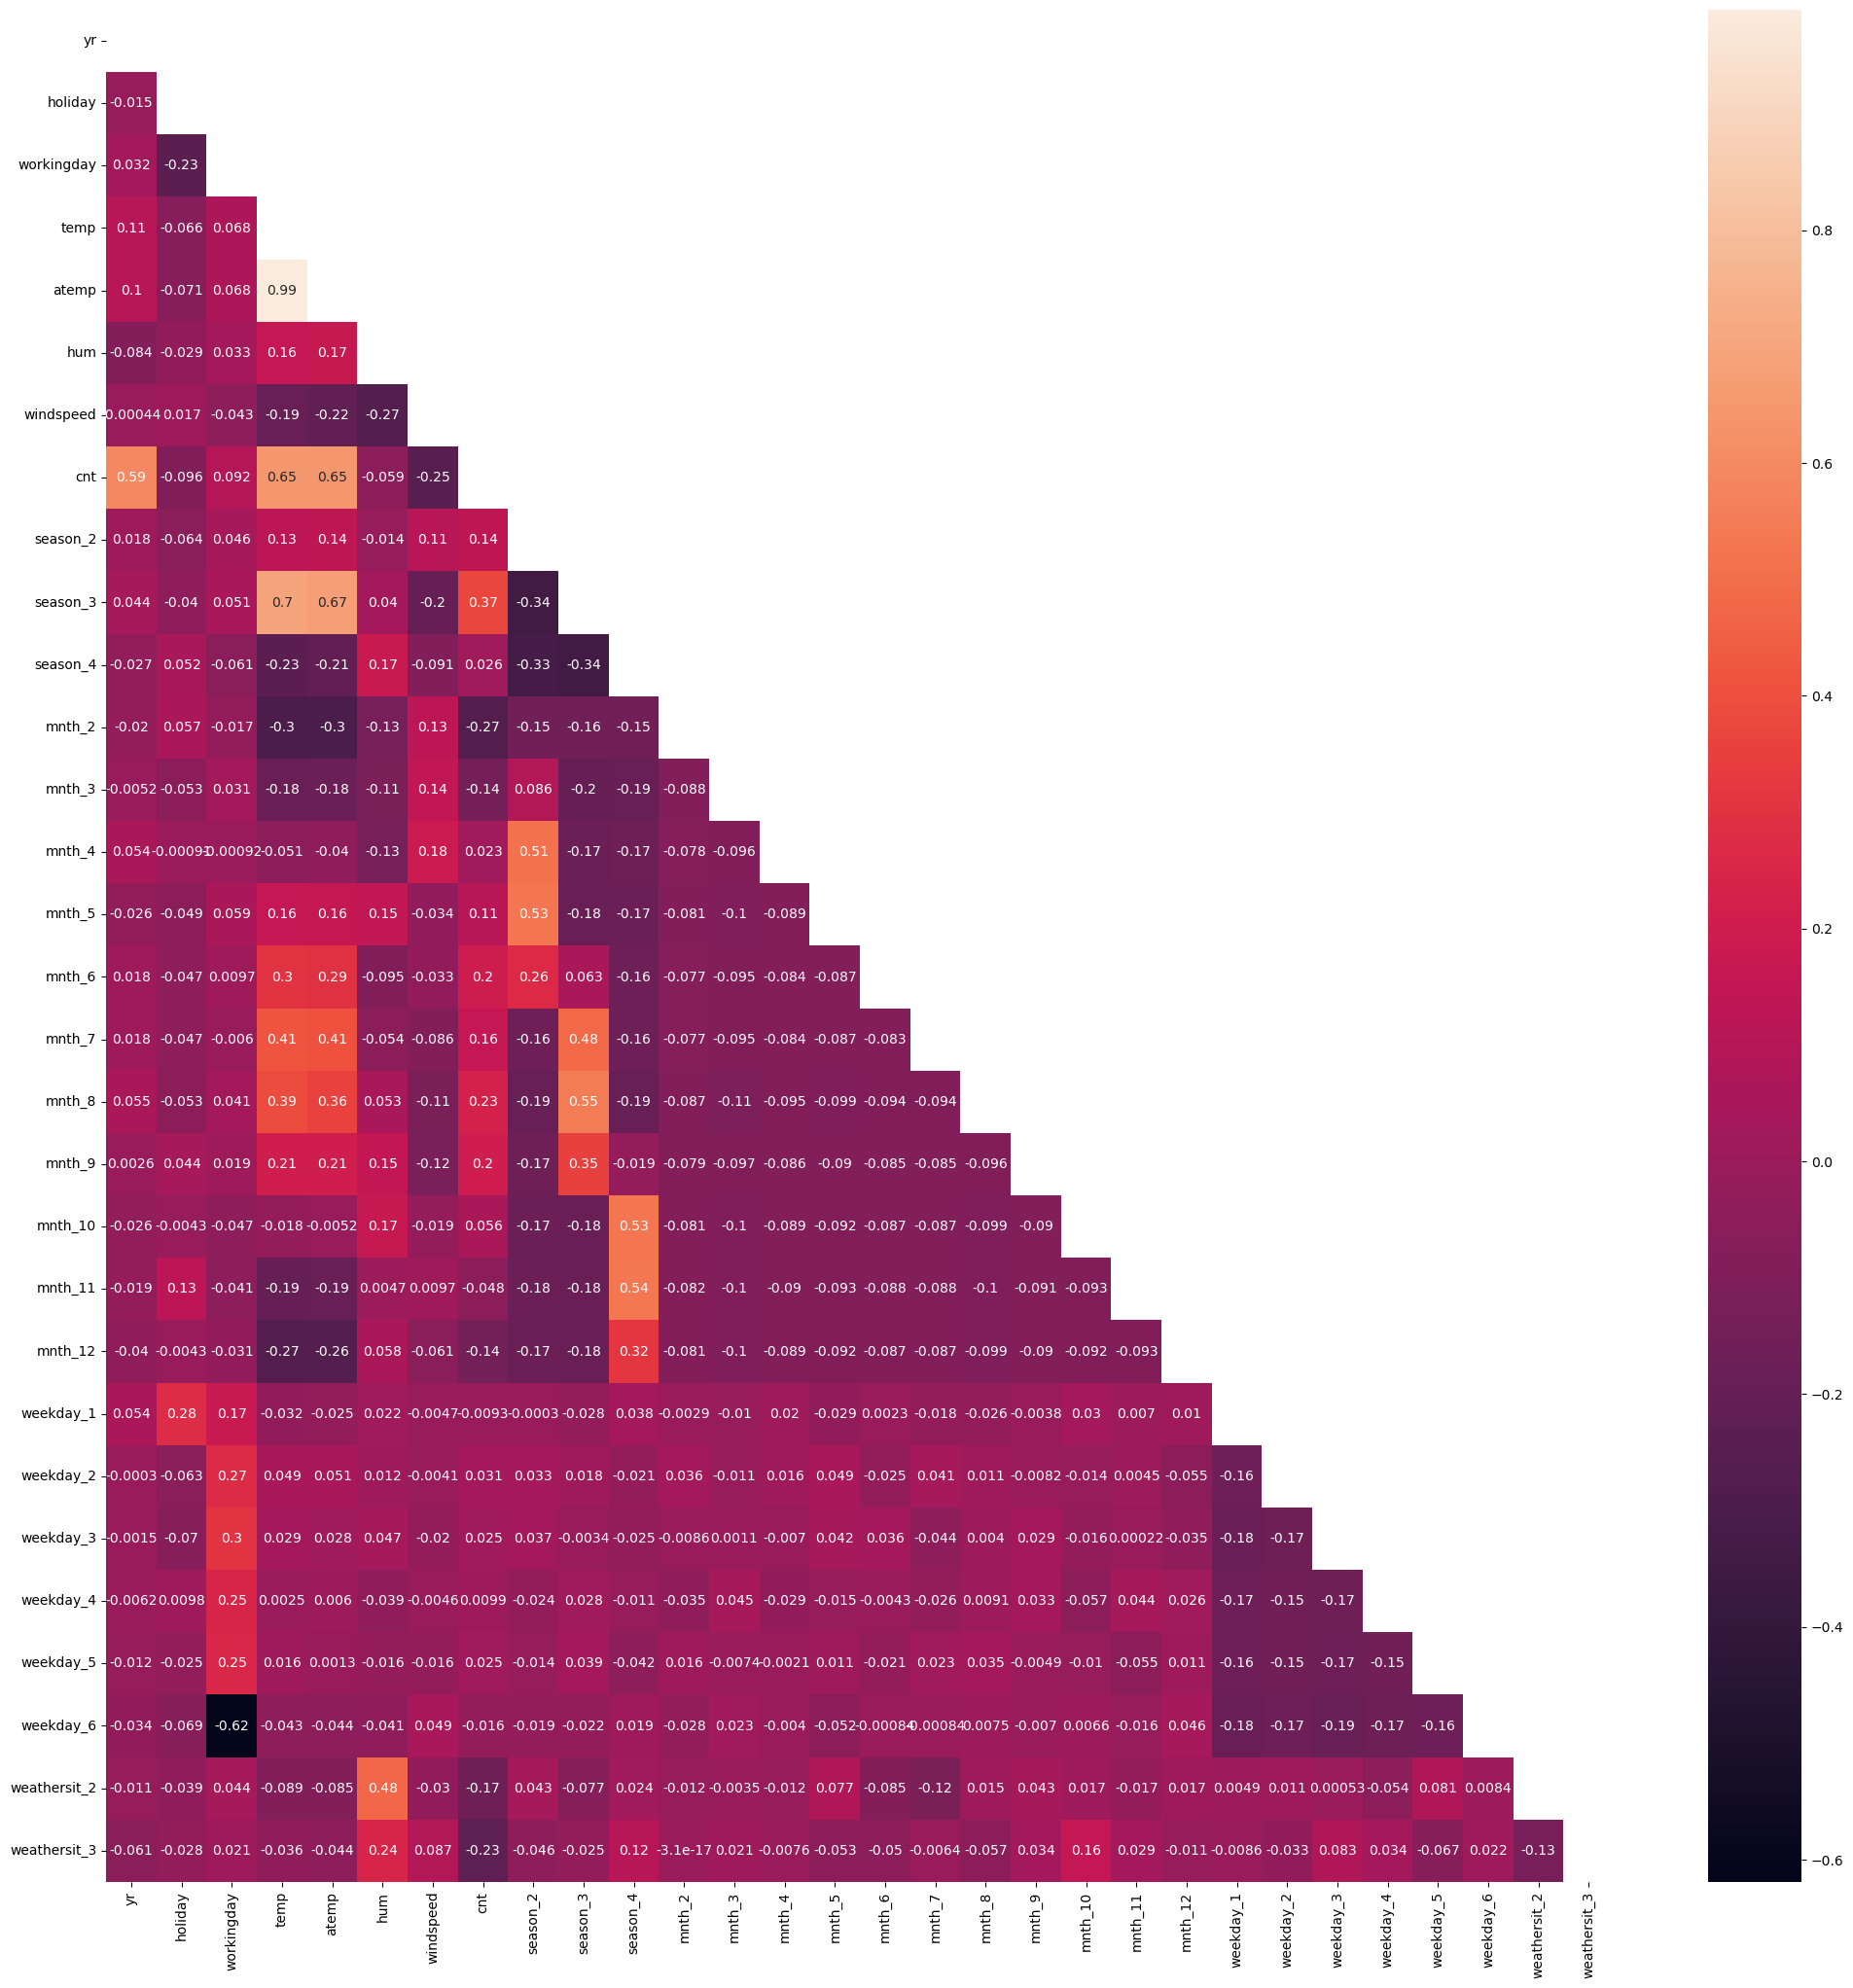

In [23]:
# check the highly correlated variables

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, mask=matrix)
plt.show()

##### cnt has correlation with temp and atemp

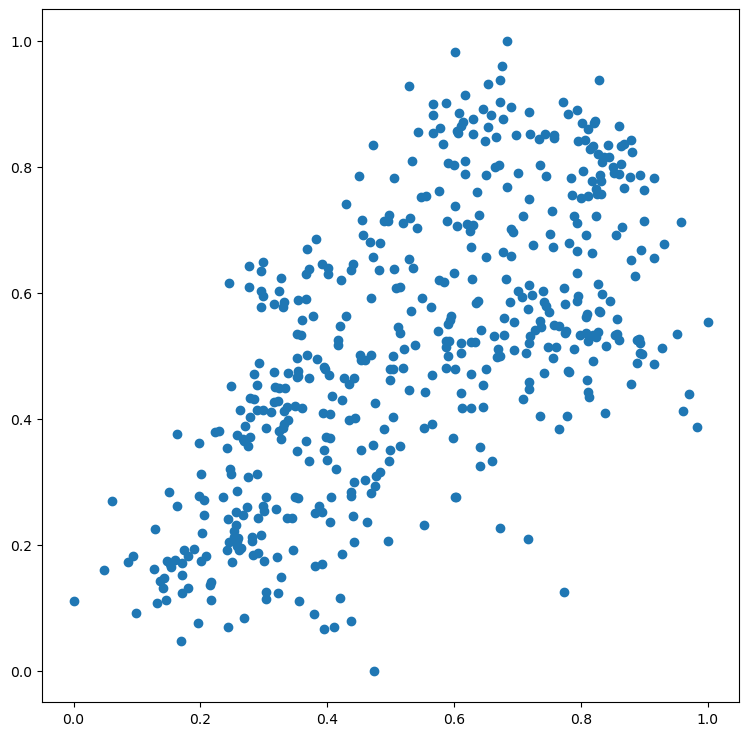

In [24]:
# Visualizing one of the correlation to see the trends via Scatter plot.
#positive correlation
plt.figure(figsize=[9,9])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Building the Linear Model

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

In [26]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,step=15)
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 2),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', False, 2),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [29]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_3'],
      dtype='object')


In [30]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'season_3', 'mnth_2', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2'],
      dtype='object')

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Model 1

In [32]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [33]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.4
Date:                Wed, 10 May 2023   Prob (F-statistic):          4.49e-182
Time:                        20:48:31   Log-Likelihood:                 495.38
No. Observations:                 510   AIC:                            -960.8
Df Residuals:                     495   BIC:                            -897.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2727      0.027     10.101   

In [34]:
lr_1.params

const           0.272658
yr              0.227283
temp            0.552347
hum            -0.288119
windspeed      -0.208988
season_2        0.070059
season_4        0.146441
mnth_3          0.042975
mnth_4          0.039491
mnth_5          0.058762
mnth_6          0.035015
mnth_8          0.067143
mnth_9          0.131886
mnth_10         0.038235
weathersit_3   -0.192695
dtype: float64

In [35]:
# As temp shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['temp'], axis = 1)


In [36]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,hum,6.43
3,season_2,6.17
2,windspeed,3.80
7,mnth_5,3.42
6,mnth_4,3.25
4,season_4,2.33
8,mnth_6,2.01
0,yr,1.97
5,mnth_3,1.66
11,mnth_10,1.56


#### VIF values seems to be good now. 

##### Model 2

In [37]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     76.47
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.98e-109
Time:                        20:48:31   Log-Likelihood:                 319.42
No. Observations:                 510   AIC:                            -610.8
Df Residuals:                     496   BIC:                            -551.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4798      0.036     13.431   

In [38]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [39]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,6.61
3,season_2,6.16
7,mnth_5,3.61
2,windspeed,3.36
6,mnth_4,3.31
8,mnth_6,2.41
0,yr,2.02
4,season_4,2.01
9,mnth_8,1.81
5,mnth_3,1.65


#### model 3

In [40]:
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.params

const           0.084796
yr              0.233296
temp            0.531132
windspeed      -0.153809
season_2        0.052414
season_4        0.133432
mnth_3          0.050341
mnth_4          0.061604
mnth_5          0.051143
mnth_6          0.057188
mnth_8          0.059793
mnth_9          0.114280
mnth_10         0.026674
weathersit_3   -0.252259
dtype: float64

In [41]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     159.0
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.28e-167
Time:                        20:48:31   Log-Likelihood:                 457.66
No. Observations:                 510   AIC:                            -887.3
Df Residuals:                     496   BIC:                            -828.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0848      0.018      4.700   

In [42]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [43]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,6.43
3,season_2,6.16
7,mnth_5,3.60
2,windspeed,3.35
6,mnth_4,3.31
8,mnth_6,2.39
0,yr,2.02
9,mnth_8,1.79
5,mnth_3,1.64
4,season_4,1.59


#### Model 4

In [44]:
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [45]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     171.8
Date:                Wed, 10 May 2023   Prob (F-statistic):          4.33e-168
Time:                        20:48:31   Log-Likelihood:                 456.69
No. Observations:                 510   AIC:                            -887.4
Df Residuals:                     497   BIC:                            -832.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0815      0.018      4.555   

In [46]:
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

In [47]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.83
2,windspeed,3.35
3,season_2,2.47
0,yr,2.02
6,mnth_4,1.72
8,mnth_8,1.68
4,season_4,1.53
7,mnth_6,1.46
9,mnth_9,1.35
5,mnth_3,1.28


#### Model 5

In [48]:
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [49]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.27e-168
Time:                        20:48:31   Log-Likelihood:                 455.23
No. Observations:                 510   AIC:                            -886.5
Df Residuals:                     498   BIC:                            -835.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0815      0.018      4.544   

In [50]:
X_train_new = X_train_new.drop(["mnth_4"], axis = 1)

In [51]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.77
2,windspeed,3.22
0,yr,2.01
3,season_2,1.80
7,mnth_8,1.68
4,season_4,1.52
6,mnth_6,1.36
8,mnth_9,1.35
5,mnth_3,1.20
9,weathersit_3,1.06


#### Model 6

In [52]:
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()


In [53]:
X_train_lm6.columns


Index(['const', 'yr', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_3',
       'mnth_6', 'mnth_8', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [54]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.96e-169
Time:                        20:48:31   Log-Likelihood:                 454.40
No. Observations:                 510   AIC:                            -886.8
Df Residuals:                     499   BIC:                            -840.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0820      0.018      4.573   

In [55]:
X_train_new = X_train_new.drop(["mnth_6"], axis = 1)

In [56]:
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.99
2,windspeed,3.19
0,yr,2.00
3,season_2,1.79
6,mnth_8,1.58
4,season_4,1.48
7,mnth_9,1.30
5,mnth_3,1.18
8,weathersit_3,1.06


In [57]:
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [58]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     227.1
Date:                Wed, 10 May 2023   Prob (F-statistic):          2.44e-170
Time:                        20:48:32   Log-Likelihood:                 453.72
No. Observations:                 510   AIC:                            -887.4
Df Residuals:                     500   BIC:                            -845.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0798      0.018      4.473      0.000       0.045       0.115
yr               0.2332      0.009     26.017      0.000       0.216       0.251
temp             0.5559      0.024     23.257      0.000       0.509       0.603
windspeed       -0.1477      0.027     -5.395      0.000      -0.202      -0.094
season_2         0.0923      0.012      7.697      0.000       0.069       0.116
season_4         0.1357      0.012     11.415      0.000       0.112       0.159
mnth_3           0.0283      0.016      1.794      0.073      -0.003       0.059
mnth_8           0.0433      0.018      2.399      0.017       0.008       0.079
mnth_9           0.1000      0.018      5.602      0.000       0.065       0.135
weathersit_3    -0.2505      0.027     -9.374      0.000      -0.303      -0.198
==============================================================================
Omnibus:                       66.238   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.015
Skew:                          -0.782   Prob(JB):                     1.43e-26
Kurtosis:                       4.777   Cond. No.                         9.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Good model as Multi Colinearity is less

<!--  
  Hypothesis Testing:
Hypothesis testing states that:

 H0:B1=B2=...=Bn=0
 H1: at least one Bi!=0
 lr6 model coefficient values -->

##### coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

#### MAKING PREDICTIONS

In [59]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

In [62]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)


In [63]:
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   temp          220 non-null    float64
 3   windspeed     220 non-null    float64
 4   season_2      220 non-null    uint8  
 5   season_4      220 non-null    uint8  
 6   mnth_3        220 non-null    uint8  
 7   mnth_8        220 non-null    uint8  
 8   mnth_9        220 non-null    uint8  
 9   weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.9 KB


In [64]:
X_test_lm7

#'const', 'yr', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_3',
      # 'mnth_6', 'mnth_8', 'mnth_9', 'weathersit_3'

,const,yr,temp,windspeed,season_2,season_4,mnth_3,mnth_8,mnth_9,weathersit_3
184,1.0,0,0.831783,0.084219,0,0,0,0,0,0
535,1.0,1,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,0,0,0
221,1.0,0,0.881625,0.339570,0,0,0,1,0,0
152,1.0,0,0.817246,0.537414,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0.519232,0.283397,0,1,0,0,0,0
127,1.0,0,0.584649,0.069510,1,0,0,0,0,0
640,1.0,1,0.745598,0.052115,0,1,0,0,0,0
72,1.0,0,0.331557,0.203418,0,0,1,0,0,0


In [ ]:
print(X_test_df.shape)

In [67]:
# Making predictions using the final model (lr6)

y_pred = lr7.predict(X_test_lm7)
y_pred_1 = lr7.predict(X_train_lm7)

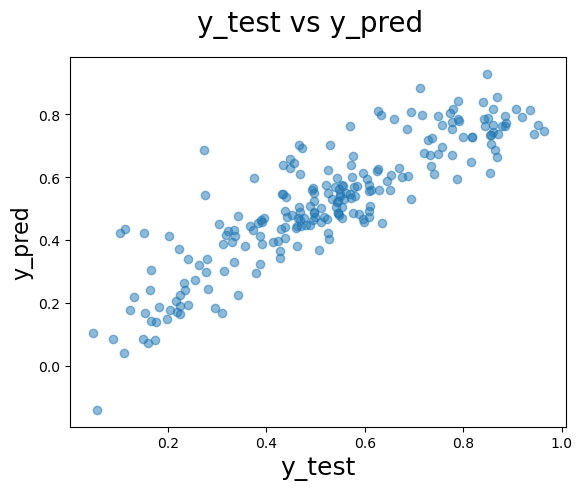

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [69]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)


In [70]:
train_r2=r2_score(y_train, y_pred_1)


In [71]:
X_test.shape

(220, 9)

In [72]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7598407791384321

In [73]:
# Calculate the R^2 score for the training data
print("Training dataset R^2: ", train_r2)
print("Testing dataset R^2",r2)
print("Testing adjusted dataset R^2",adjusted_r2)
# Adj. R-squared:	0.800 from lr7.summary()

Training dataset R^2:  0.8034340217318539
Testing dataset R^2 0.7697103361601403
Testing adjusted dataset R^2 0.7598407791384321
